In [1]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM

In [2]:
# Chosing a model from the model hub
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForCausalLM.from_pretrained("distilgpt2")

In [3]:
# Generating Text
generator = pipeline(task="text-generation", model=model, tokenizer=tokenizer)
print(generator("Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone", 
                max_length=30,
                num_return_sequences=2))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, and Nine for the Old Gods'}, {'generated_text': 'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone. From the rock pillars, to'}]


In [6]:
# Mask filling
unmasker = pipeline(task="fill-mask")
unmasker("Did you hear the breaking news from <mask>?", top_k=5)

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.26099395751953125,
  'token': 6733,
  'token_str': ' TODAY',
  'sequence': 'Did you hear the breaking news from TODAY?'},
 {'score': 0.08675087988376617,
  'token': 452,
  'token_str': ' today',
  'sequence': 'Did you hear the breaking news from today?'},
 {'score': 0.041865814477205276,
  'token': 10541,
  'token_str': ' RT',
  'sequence': 'Did you hear the breaking news from RT?'},
 {'score': 0.030455561354756355,
  'token': 10872,
  'token_str': ' NPR',
  'sequence': 'Did you hear the breaking news from NPR?'},
 {'score': 0.01829582266509533,
  'token': 3480,
  'token_str': ' CNN',
  'sequence': 'Did you hear the breaking news from CNN?'}]

In [12]:
text =  """
MI is a collaborative, goal-oriented style of communication with particular attention to the language of change. 
It is designed to strengthen personal motivation for and commitment to a specific goal by eliciting and exploring 
the person’s own reasons for change within an atmosphere of acceptance and compassion. MI is a guiding style of 
communication, that sits between following (good listening) and directing (giving information and advice).
MI is designed to empower people to change by drawing out their own meaning, importance and capacity for change.
MI is based on a respectful and curious way of being with people that facilitates the natural process of change 
and honors client autonomy. It is important to note that MI requires the clinician to engage with the client 
as an equal partner and refrain from unsolicited advice, confronting, instructing, directing, or warning. 
It is not a way to “get people to change” or a set of techniques to impose on the conversation. MI takes time, 
practice and requires self-awareness and discipline from the clinician.

While the principles and skills of MI are useful in a wide range of conversations, MI is particularly useful to help people 
examine their situation and options when ambivalence is high and people are stuck in mixed feelings about change. 
It is also applicable when confidence is low and people doubt their abilities to change, when desire is low and 
people are uncertain about whether they want to make a change and when importance is low and the benefits 
of change and disadvantages of the current situation are unclear.
"""

summarizer = pipeline("summarization")
summarizer(text.replace('\n', ''))

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' MI is a collaborative, goal-oriented style of communication with particular attention to the language of change . It is designed to strengthen personal motivation for and commitment to a specific goal . MI requires the clinician to engage with the client as an equal partner and refrain from unsolicited advice, confronting, instructing, directing, or warning .'}]

## History of Transformers
Three types of transformers
- GPT-like (also called auto-regressive Transformer models)
- BERT-like (also called auto-encoding Transformer models)
- BART/T5-like (also called sequence-to-sequence Transformer models)
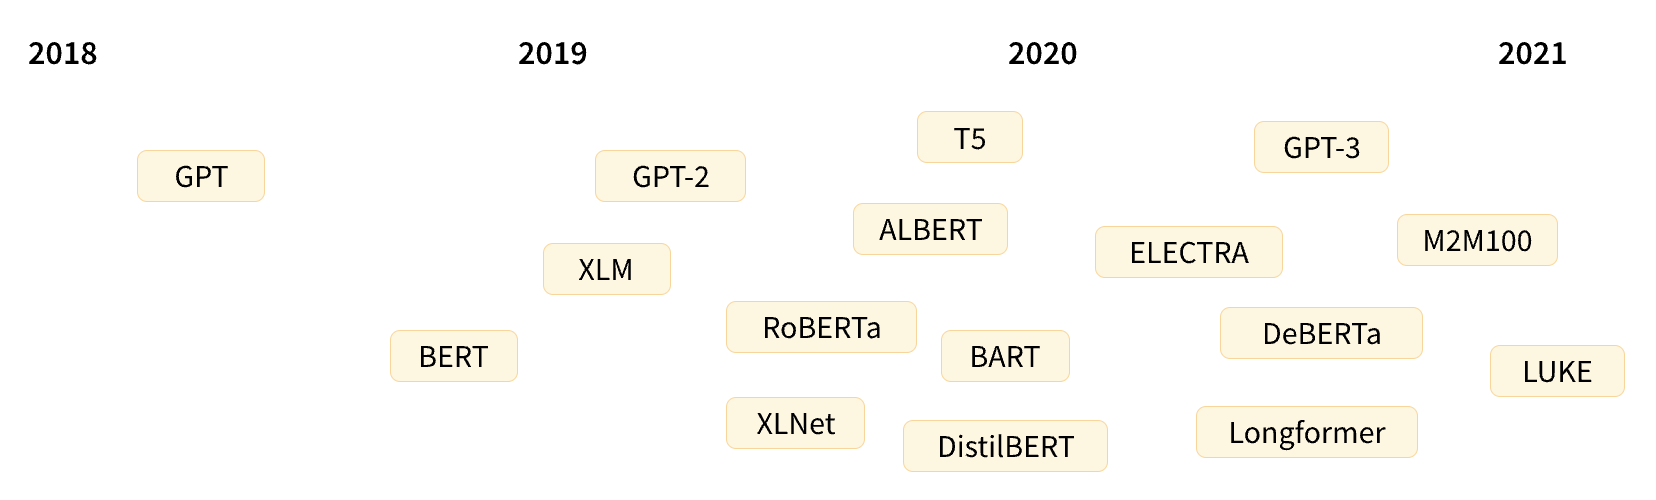

## Transformers as Language Models
Typically language models develops a statistical understanding of the language it's trained on but does not have any understanding of specific tasks. We perform transfer learning to fit it into a specific task.

One instance is **causal language modeling** which reads the previous  *n* words and predicts the next word. Another is **masked language modeling** which predicts a masked word in the sentence.

## General Architectures

Transformer models are primarily composed of two blocks:
- **Encoder:** Receives inputs and builds a representation of its features, optimized to acquire understanding from the input
- **Decoder:** Uses the encoder's representation plus other inputs to generate a target sequence
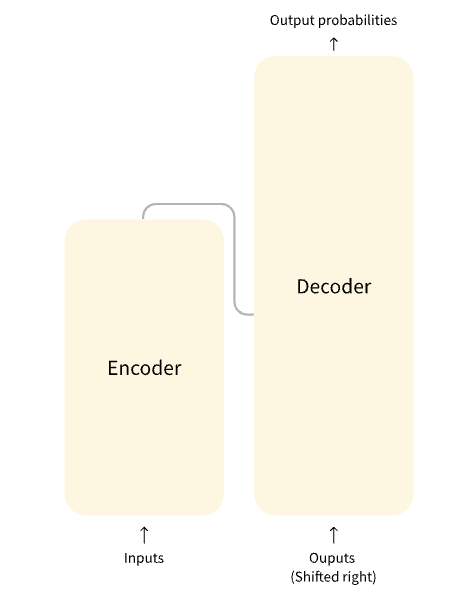

Not all transformers need to contain both an encoder and decode, these parts can be used and trained independently depending on the task.
**Encoder-Only Models:** Good for tasks that require understanding of an input, ie. sentence classifications and named entity recognition.
**Decoder-Only Models:** Good for generative tasks such as text generation.
**Encoder-Decoder Models:** Also known as sequence-to-sequence models, good for generative tasks requireing an input such as translation, summarization.

## The Classic ATTENTION IS ALL YOU NEED
Simply put, attention is a layer which informs the model to pay specific "attention" to certain words in the sentence it received as input while ignoring others. 

## Encoder Models
At each stage, the attention layers can access all the words in the initial sentence. These models are often characterized as having "bi-directional" attention and often called **auto-encoding models**. The encoder spits out a vectorized representation of each word, with the values in a word vector being affected by the words both before and after it, handled by the attention layers.

## Decoder Models
Similar to encoder models but use a uni-directional attetion layer resulting in vecotized representations of each word where the values for a given word are only effected by the words before it. Also called **auto-regressive models**.

Does this mean the decoder runs iteratively multiple times to generate one term of the output each time?

## Verification
Ran through the end of chapter quiz to verify understanding!

"lecture 7 not great" - Prof Rose
"lecture 6 is pretty good!" - Prof Rose